In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

In [34]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

RuntimeError: Physical devices cannot be modified after being initialized

In [63]:
standard_dir = "/content/drive/MyDrive/ImageClassification/"

In [3]:
train = "archive/train"
print(os.listdir(train))

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [100]:
data = tf.keras.utils.image_dataset_from_directory(train, label_mode='categorical')
data
data_iterator = data.as_numpy_iterator()


Found 28709 files belonging to 7 classes.


In [97]:
tf.keras.utils.image_dataset_from_directory??

In [107]:
batch = data.as_numpy_iterator().next()

In [102]:
batch[1]

array([[0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
 

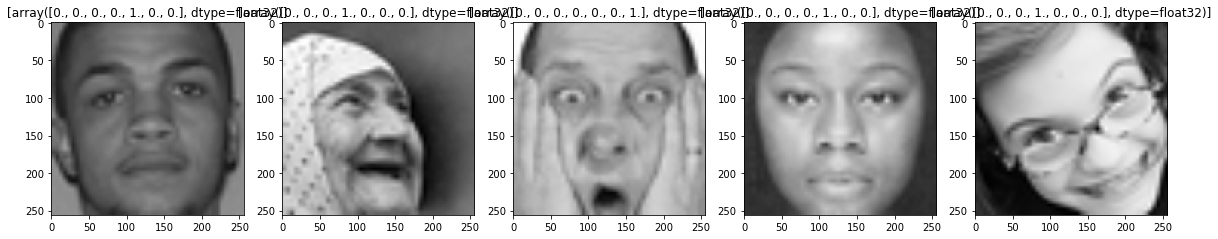

In [63]:
max = len(batch[1])
max = 5
fig, ax = plt.subplots(ncols=max, figsize=(20,20))
for idx, img in enumerate(batch[0][:max]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text([batch[1][idx]])


In [103]:
data = data.map(lambda x,y: (x/255, y))

In [104]:
len(data)

898

In [105]:
train_size = int(len(data)*0.8)
val_size = int(len(data)*0.2)+1


train_size + val_size

898

In [108]:
batch[0].max()

1.0

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [117]:
model = Sequential()

In [118]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='sigmoid'))

In [119]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 30, 30, 16)      

In [24]:
logdir='logs'
logdir

'logs'

In [74]:
callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [113]:
training_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)

In [114]:
len(val_data)+len(training_data)

898

In [123]:
hist = model.fit(training_data, epochs=50, validation_data=val_data, callbacks=[callback])

Epoch 1/50
718/718 [==============================] - 38s 52ms/step - loss: 0.0418 - accuracy: 0.9882 - val_loss: 5.4740 - val_accuracy: 0.4415
Epoch 2/50
718/718 [==============================] - 38s 52ms/step - loss: 0.0329 - accuracy: 0.9921 - val_loss: 5.6958 - val_accuracy: 0.4490
Epoch 3/50
718/718 [==============================] - 38s 52ms/step - loss: 0.0402 - accuracy: 0.9885 - val_loss: 4.9834 - val_accuracy: 0.4537
Epoch 4/50
718/718 [==============================] - 38s 52ms/step - loss: 0.0304 - accuracy: 0.9919 - val_loss: 5.9783 - val_accuracy: 0.4556
Epoch 5/50
718/718 [==============================] - 38s 52ms/step - loss: 0.0313 - accuracy: 0.9930 - val_loss: 5.4464 - val_accuracy: 0.4580
Epoch 6/50
718/718 [==============================] - 38s 52ms/step - loss: 0.0318 - accuracy: 0.9917 - val_loss: 5.8409 - val_accuracy: 0.4547
Epoch 7/50
718/718 [==============================] - 38s 52ms/step - loss: 0.0265 - accuracy: 0.9935 - val_loss: 6.2078 - val_accuracy:

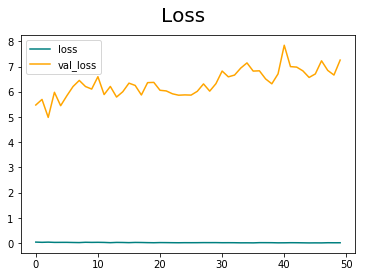

In [124]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

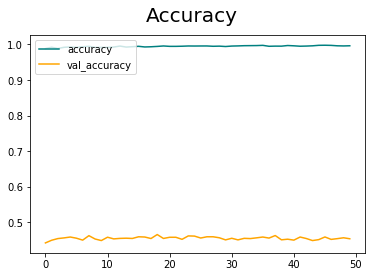

In [125]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [126]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [127]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [129]:
test_dir = "archive/train"
test = tf.keras.utils.image_dataset_from_directory(test_dir, label_mode='categorical')
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

Found 28709 files belonging to 7 classes.
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 60ms/step


In [130]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.49163386, shape=(), dtype=float32) tf.Tensor(0.7655439, shape=(), dtype=float32) tf.Tensor(0.8534208, shape=(), dtype=float32)


In [134]:
# fig, ax = plt.subplots(ncols=max, figsize=(20,20))
# for idx, img in enumerate(batch[0][:max]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text([batch[1][idx]])
x = test.as_numpy_iterator().next()[0]
yhat = model.predict(x)
print(yhat??)

1/1 [==============================] - 0s 34ms/step


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [143]:
for i in yhat:
    print(i)
    print(np.where(i==i.max()))

[1. 0. 0. 0. 0. 0. 0.]
(array([0], dtype=int64),)
[0. 0. 1. 1. 0. 0. 0.]
(array([2, 3], dtype=int64),)
[0. 0. 1. 0. 0. 0. 1.]
(array([2, 6], dtype=int64),)
[1. 0. 0. 0. 1. 0. 0.]
(array([0, 4], dtype=int64),)
[1. 0. 0. 0. 0. 0. 0.]
(array([0], dtype=int64),)
[0. 0. 0. 0. 1. 0. 0.]
(array([4], dtype=int64),)
[0. 0. 0. 1. 0. 1. 0.]
(array([3, 5], dtype=int64),)
[0. 0. 0. 1. 0. 0. 0.]
(array([3], dtype=int64),)
[0. 0. 1. 0. 0. 0. 1.]
(array([2, 6], dtype=int64),)
[1. 0. 0. 0. 0. 0. 0.]
(array([0], dtype=int64),)
[0.0000000e+00 4.7319892e-04 0.0000000e+00 1.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]
(array([3], dtype=int64),)
[0. 0. 1. 0. 1. 0. 0.]
(array([2, 4], dtype=int64),)
[0. 0. 1. 0. 0. 0. 1.]
(array([2, 6], dtype=int64),)
[0. 0. 0. 0. 0. 1. 0.]
(array([5], dtype=int64),)
[1. 0. 0. 0. 0. 0. 0.]
(array([0], dtype=int64),)
[0. 0. 0. 0. 1. 0. 0.]
(array([4], dtype=int64),)
[1. 0. 0. 0. 1. 0. 0.]
(array([0, 4], dtype=int64),)
[0. 0. 0. 0. 1. 0. 0.]
(array([4], dtype=int64),